In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv('../input/data.csv')

In [ ]:
data.head()

In [ ]:
data_radius_mean = data.radius_mean.describe()

In [ ]:
data.corr()

covariance: np.cov()
* matrix:
        [cov(x,x)    cov(x,y)
         cov(y,x)     cov(y,y)]

In [ ]:
x = data.radius_mean
y = data.texture_mean
np.cov(x, y)

In [ ]:
x.cov(y) # cov(x,y) sadece

In [ ]:
np.std(x)

In [ ]:
np.std(y)

In [ ]:
x.head(10)

In [ ]:
x.head(10).rank(ascending=1)

In [ ]:
data.rank(ascending=1)

**Conditional Probability**

Question:

52'lik bir oyun kartı destesini karıştırıyoruz. Karıştırdıktan sonra kapalı bir şekilde masaya koyuyoruz. Sonra en üstten iki tane kart çekiyoruz ikisininde sinek gelme olasılığı nedir? (Not: 52 lik bir kart içerisinde 13 tane sinek bulunur)

In [ ]:
from scipy.special import comb
C_52_2 = comb(52, 2, exact=False)
C_13_2 = comb(13, 2, exact=False)
probability = C_13_2 / C_52_2
probability

## Uniform Distribution 

In [ ]:
distribution = np.random.randint(1,7,600000)
sample_space = np.unique(distribution)
print('sample spase is: ', sample_space)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(distribution, bins=12)
plt.show()

In [ ]:
import seaborn as sns
sns.countplot(distribution)
plt.show()

## Binomial Distribution

**Soru**:

deney: zar atma 

p: Basari: zarin 6 gelmesi

n: Deneme sayisi: 5

r: basari sayisi = 1 olsun

Bu 5 atistan sadece r = 1 kez basarili olma olasiligi nedir?

C(5,1) * (1/6)^1 * (5/6)^9

In [ ]:
print('5 defada 1 kez basarili olma ihtimali: ',comb(5, 1, exact=False)*((1/6)**1)*((5/6)**4))

In [ ]:
print('5 defada 0 kez basarili olma ihtimali: ',comb(5, 0, exact=False)*((1/6)**0)*((5/6)**5))
print('5 defada 1 kez basarili olma ihtimali: ',comb(5, 1, exact=False)*((1/6)**1)*((5/6)**4))
print('5 defada 2 kez basarili olma ihtimali: ',comb(5, 2, exact=False)*((1/6)**2)*((5/6)**3))
print('5 defada 3 kez basarili olma ihtimali: ',comb(5, 3, exact=False)*((1/6)**3)*((5/6)**2))
print('5 defada 4 kez basarili olma ihtimali: ',comb(5, 4, exact=False)*((1/6)**4)*((5/6)**1))
print('5 defada 5 kez basarili olma ihtimali: ',comb(5, 5, exact=False)*((1/6)**5)*((5/6)**0))

In [ ]:
# ya da
total_prob = 0
for i in range(0,6):
    succes = comb(5, i, exact=False)*((1/6)**i)*((5/6)**(5-i))
    print('5 defada {0} kez basarili olma ihtimali: {1}'.format(i, succes))
    total_prob+=succes
print('total probability: ', total_prob)

**soru: **

Bir zar 10 kez atılıyor. 4 kere 6 sayısı gelme olasılığı nedir?

In [ ]:
# OR
from scipy.stats import binom
print(binom.pmf(4,10,1/6)) # pmf(r,n,p) yada C(10,4) * (1/6)^4 * (5/6)^6

## Poisson Distribution

* number of succes per unit time (or interval)
* lambda = number of occurances / interval
* P(X) =
 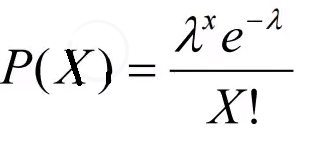

Question

lambda = 3 (lets say 3 trucks are reaching to the factory in each hour)

In [ ]:
import math
import scipy.special
P_1 = (np.power(3,1) * np.exp(-3)) / math.factorial(1)

In [ ]:
lambda_ = 3
prob = []
for x in range(0, 20):
    probability = (np.power(lambda_,x) * np.exp(-lambda_)) / math.factorial(x)
    prob.append(probability)

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0,20,1)
plt.scatter(x, prob)
plt.xlabel('number of occurances')
plt.ylabel('probability')
plt.title('poisson distribution')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
# OR
lambda_ = 3
s1 = np.random.poisson(lambda_, 100000)
weights_ = np.ones_like(s1) / float(len(s1))
plt.hist(s1, weights = weights_, bins=100)
plt.xlabel('number of occurances')
plt.ylabel('probability')
plt.title('poisson distribution')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

## Normal Distribution

In [ ]:
mu, sigma = 110, 20 # parameters of normal distribution mean and std
s = np.random.normal(mu,sigma, 100000) # 100.000 tane insan
print('mean: ', np.mean(s))
print('standart deviation: ', np.std(s))
plt.figure(figsize=(10,7))
plt.hist(s, bins=100)
plt.xlabel('IQ')
plt.ylabel('frequency')
plt.show()

In [ ]:
import numpy as np
10 * np.random.random_sample((3,2))

## **Hypothesis Testing**

In [ ]:
from scipy import stats
statistics, p_value = stats.ttest_rel(data.radius_mean, data.area_mean)
print('H0: there is no relation between radius_mean and area_mean')
print('H1: there is relation')
print('let a=0.001 namely %99.9 accuracy')
print('p value: ', p_value)
print('as p<a, we say H1 is accepted with %99.9 accuracy')

## ANOVA

In [ ]:
import numpy as sp
import matplotlib.pyplot as plt
import seaborn as sns
s1 = np.random.normal(48,15, 20) # 20 tane primary 
s2 = np.random.normal(52,10, 20) # 20 tane secondary
s3 = np.random.normal(55,5, 20) # 20 tane undergraduate

# plot pdf
sns.kdeplot(s1)
sns.kdeplot(s2)
sns.kdeplot(s3)
plt.show()

**F distribution**

In [ ]:
from scipy import stats
stats.f_oneway(s1, s2, s3) # statistics = a (here a is f value)

* **if f_value > f_critical_value(from table)**
* **it is in rejection region**
* **reject null hypothesis**
* **accept H1**

## Chi - Square
* it is utilized to oberve whether the difference between observed frequency and expected frequency is logical
* for example: 10 coin toss
* we expect 5 head and 5 tail
* we observe 9 head and 1 tail
* Question: Is this result expected or the coin is biased 

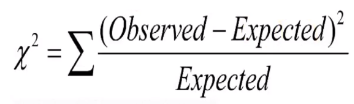

In [ ]:
# another example
# H0: observation values are normal
observation = np.array([5,7,9,4,1,10,6]) # frequencies
expected = np.sum(observation) / len(observation) # it is assumed
chi_value = np.sum((observation-expected)**2/expected)
print('expected value: ', expected)
print('chi value: ', chi_value)

In [ ]:
# from table find critical value of chi square
from scipy.stats import chi2
crit_val = chi2.isf(0.05, 6) # d = 0.05, degree of freedom = 6 (number of element -1)
print('critical value: ', crit_val)

- chi value < critical value
- so fail to reject H0